# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнила студентка гр. 3385 Завьялова Виктория Дмитриевна. Вариант №7.

## Цель работы

Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения


## Основные понятия анализа социальных сетей

### 1. Представление сетей

### Социоматрица (матрица смежности)

Социальная сеть может быть представлена в виде квадратной матрицы **A** размером $g \times g$, где $g$ — число акторов (вершин) в сети. Элемент матрицы $a_{ij}$ определяется следующим образом:

$$
a_{ij} =
\begin{cases}
1, & \text{если существует связь от актора } i \text{ к актору } j \\
0, & \text{в противном случае}
\end{cases}
$$

Для **неориентированных сетей** матрица симметрична: $a_{ij} = a_{ji}$.

### Список рёбер

Альтернативный способ представления сети — перечисление всех существующих связей в виде множества упорядоченных пар:

$$
E = \{(i, j) \mid a_{ij} = 1\}
$$

Каждая пара $(i, j)$ соответствует ребру (или дуге) из вершины $i$ в вершину $j$.



## 2. Плотность сети

Плотность сети характеризует степень связанности акторов. Для **неориентированного графа** $G$ плотность вычисляется по формуле:

$$
\text{den}(G) = \frac{2L}{g(g-1)}
$$

где:
- $L$ — количество рёбер в графе,
- $g$ — количество вершин.

Знаменатель $g(g-1)$ — это максимально возможное число рёбер в неориентированном графе без петель.



## 3. Компоненты связности

**Компонента связности** — это максимальное подмножество вершин графа, в котором между любыми двумя вершинами существует путь. Все вершины внутри одной компоненты достижимы друг из друга, а вершины из разных компонент не связаны.



## 4. Диаметр сети

Диаметр сети — это максимальное расстояние между двумя вершинами в графе. Формально для графа $G$ диаметр определяется как:

$$
\text{diam}(G) = \max_{i,j} \, d_{ij}
$$

где $d_{ij}$ — длина кратчайшего пути (геодезическое расстояние) между вершинами $i$ и $j$.



## 5. Коэффициент кластеризации

### Локальный коэффициент кластеризации

Для вершины $i$ в графе $G$ локальный коэффициент кластеризации $Cl_i$ показывает, насколько соседи вершины связаны между собой:

$$
Cl_i(G) = \frac{2N_i}{k_i(k_i - 1)}
$$

где:
- $N_i$ — число треугольников, проходящих через вершину $i$,
- $k_i$ — степень вершины $i$ (количество её соседей).

Знаменатель $k_i(k_i-1)$ — это максимально возможное число рёбер между соседями вершины $i$.

### Глобальный коэффициент кластеризации

Средний по сети коэффициент кластеризации вычисляется как среднее арифметическое локальных коэффициентов:

$$
Cl(G) = \frac{1}{n} \sum_{i=1}^n Cl_i
$$

Этот показатель отражает общую склонность сети к образованию кластеров (треугольников).




# Меры центральности в сетях

## 1. Центральность по степени

**Центральность по степени** измеряет количество непосредственных связей вершины с другими вершинами сети.

### Для неориентированной сети:

**Базовая формула:**
$$C_D(i) = \text{deg}(i)$$

где $\text{deg}(i)$ — степень вершины $i$ (количество инцидентных рёбер).

**Нормированная версия:**
$$C_D'(i) = \frac{\text{deg}(i)}{g - 1}$$

где $g$ — общее количество вершин в сети.

*Интерпретация:* Нормированная центральность показывает, какую долю от максимально возможного числа связей имеет данная вершина.



## 2. Центральность по близости

**Центральность по близости** характеризует, насколько вершина близка ко всем остальным вершинам сети по кратчайшим путям.

**Базовая формула:**
$$C_C(i) = \frac{1}{\sum_{j \neq i} d_{ij}}$$

где $d_{ij}$ — длина кратчайшего пути между вершинами $i$ и $j$.

**Нормированная версия:**
$$C_C'(i) = \frac{g-1}{\sum_{j \neq i} d_{ij}}$$

*Интерпретация:* Чем меньше сумма расстояний от вершины до всех других вершин, тем выше её центральность по близости.



## 3. Центральность по посредничеству

**Центральность по посредничеству** измеряет, насколько часто вершина выступает в роли "моста" на кратчайших путях между другими вершинами.

**Базовая формула:**
$$C_B(i) = \sum_{j < k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}$$

где:
- $\sigma_{jk}$ — общее количество кратчайших путей между вершинами $j$ и $k$,
- $\sigma_{jk}(i)$ — количество кратчайших путей между $j$ и $k$, которые проходят через вершину $i$.

**Нормированная версия:**
$$C_B'(i) = \frac{2 C_B(i)}{(g-1)(g-2)}$$

*Интерпретация:* Вершины с высокой центральностью по посредничеству контролируют поток информации в сети.



## 4. Центральность по информации

**Центральность по информации** оценивает важность вершины с точки зрения её вклада в общую связность сети.

### Алгоритм вычисления:

1. **Вычислить матрицу псевдосмежности:**
   $$A = 1 + K$$
   где $K$ — матрица Кирхгофа размера $g \times g$.

2. **Найти обратную матрицу:**
   $$C = A^{-1}$$

3. **Вычислить вспомогательные величины:**
   - $T = \text{Tr}(C)$ — след матрицы $C$ (сумма диагональных элементов)
   - $R = \sum_{i,j} c_{ij}$ — сумма всех элементов матрицы $C$

4. **Вычислить центральность по информации:**
   $$C_I(i) = \frac{1}{c_{ii} + (T - 2R)/g}$$

**Нормированная версия:**
$$C_I'(i) = \frac{C_I(i)}{\sum_{j=1}^g C_I(j)}$$

*Интерпретация:* Вершина имеет высокую информационную центральность, если её удаление существенно уменьшает связность сети.



## Сравнение мер центральности

| Мера центральности | Что измеряет | Когда использовать |
|-------------------|-------------|-------------------|
| **По степени** | Количество непосредственных связей | Для выявления популярных или активных акторов |
| **По близости** | Близость ко всем остальным вершинам | Для выявления акторов, быстро получающих информацию |
| **По посредничеству** | Роль "моста" между другими | Для выявления контролирующих поток информации |
| **По информации** | Вклад в общую связность сети | Для выявления критически важных для сети узлов |


# Меры престижа для ориентированных сетей

## 1. Престиж по степени (Degree Prestige)

**Престиж по степени** измеряет популярность вершины на основе количества входящих связей.

**Формула:**
$$P_D(i) = \frac{\text{deg}_\text{in}(i)}{g-1}$$

где:
- $\text{deg}_\text{in}(i)$ — полустепень захода (количество дуг, входящих в вершину $i$)
- $g$ — общее количество вершин в сети

**Интерпретация:** Показывает, какая доля от всех возможных вершин сети выбирает данную вершину.



## 2. Престиж по близости (Proximity Prestige)

**Престиж по близости** учитывает как количество достижимых вершин, так и среднее расстояние до них.

**Формула:**
$$P_P(i) = \frac{|I_i|}{g-1} \cdot \frac{|I_i|}{\sum_{j \in I_i} d_{ij}}$$

где:
- $|I_i|$ — количество вершин, достижимых из вершины $i$
- $d_{ij}$ — длина кратчайшего пути от вершины $i$ до вершины $j$
- $g$ — общее количество вершин

**Интерпретация:** Объединяет две идеи: доля достижимых вершин и обратное среднее расстояние до них.



## 3. Престиж по рангу (Rank Prestige)

**Престиж по рангу** вычисляется на основе рекурсивного подхода, где престиж вершины зависит от престижа вершин, которые её выбирают.

### Алгоритм вычисления:

1. **Найти максимальное собственное значение:**
   $\lambda$ — максимальное собственное значение социоматрицы $X$

2. **Вычислить параметр:**
   $a = \frac{1}{\lambda}$

3. **Решить систему уравнений:**
   $$\left(\frac{1}{a}E - X\right)^T P_R = x$$
   
   где:
   - $X$ — социоматрица сети
   - $E$ — единичная матрица
   - $x$ — вектор сумм столбцов социоматрицы
   - $P_R$ — вектор престижа по рангу

4. **Нормировать результат:**
   $$P_R'(i) = \frac{P_R(i)}{m}$$
   
   где:
   $$m = \sum_{k=1}^{g-1} a^k A^k_{g-1}$$

**Интерпретация:** Престиж вершины тем выше, чем выше престиж вершин, которые её выбирают (рекурсивное определение).


## Сравнение мер престижа

| Мера престижа | Основа вычисления | Когда использовать |
|---------------|-------------------|-------------------|
| **По степени** | Количество входящих связей | Для оценки популярности |
| **По близости** | Достижимость и расстояния | Для оценки влияния на всю сеть |
| **По рангу** | Рекурсивная важность выбирающих | Для оценки социального статуса |



# Алгоритмы визуализации сетей

## 1. Алгоритм Фрюхтермана-Рейнгольда

**Основная идея:** Физическая аналогия с системой заряженных частиц и пружин.

**Принципы работы:**
- Вершины отталкиваются друг от друга
- Связанные вершины притягиваются

**Энергетическая функция:**
$$E = \sum_{i \neq j} k_r(d_{ij}) + \sum_{(i,j) \in E} k_a(d_{ij})$$

где:
- $k_r$ — сила отталкивания между вершинами
- $k_a$ — сила притяжения между связанными вершинами
- $d_{ij}$ — расстояние между вершинами $i$ и $j$

**Особенности:** Хорошо подходит для визуализации средних сетей (до нескольких сотен вершин).



## 2. Алгоритм Камады-Каваи

**Основная идея:** Минимизация различия между теоретическими и фактическими расстояниями.

**Принципы работы:**
- Желаемое расстояние между вершинами пропорционально длине кратчайшего пути
- Система стремится к равновесному состоянию

**Энергетическая функция:**
$$E = \sum_{i \neq j} \frac{1}{2} k_{ij}(||p_i - p_j|| - l_{ij})^2$$

где:
- $l_{ij}$ — желаемое расстояние между вершинами (обычно пропорционально геодезическому расстоянию)
- $||p_i - p_j||$ — фактическое евклидово расстояние
- $k_{ij}$ — весовой коэффициент (часто $k_{ij} = 1/l_{ij}^2$)

**Особенности:** Даёт более точное представление о структурной близости вершин.



## Сравнение алгоритмов

| Алгоритм | Основной принцип | Лучше всего подходит для |
|----------|-----------------|--------------------------|
| **Фрюхтерман-Рейнгольд** | Физические силы отталкивания/притяжения | Общего обзора структуры сети |
| **Камада-Каваи** | Минимизация расхождения расстояний | Отображения структурной близости |



## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы


### Загрузка необходимых библиотек

In [3]:
# Подключаем библиотеку для работы с графами
if (!require(igraph)) {
  install.packages("igraph")
  library(igraph)
}

# Подключаем библиотеку, которая привнесет функцию для перевода графа библиотеки igraph в граф statnet
if (!require(intergraph)) {
  install.packages("intergraph")
  library(intergraph)
}

# Подключаем библиотеку для анализа графа
if (!require(statnet)) {
  install.packages("statnet")
  library(statnet)
}

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: intergraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘intergraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘statnet.common’, ‘network’


Loading required package: statnet

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘statnet’”
Installing package into ‘/usr/local/lib/R/site-lib

### Работа с florentine_business.csv

#### 1. Извлечение из florentine_business.csv социоматрицы


In [1]:
file_url <- "https://drive.google.com/uc?export=download&id=1shboWsyEAABA1P2EM4CtN5Y6FeRiwZi3"

# Загрузка данных из CSV файла
florentine_data <- read.csv(file_url,
                 header = FALSE,
                 skip = 1,           # пропускаем строку с описанием данных
                 sep = ",",
                 stringsAsFactors = FALSE)

# Формирование вспомогательной матрицы для определения размеров
temp_data_matrix <- florentine_data[-1, ]

# Преобразование в числовую социоматрицу
social_matrix <- matrix(as.numeric(unlist(temp_data_matrix)),
                       nrow = nrow(temp_data_matrix),
                       ncol = ncol(temp_data_matrix))

# Вывод полученной матрицы
print(social_matrix)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [2,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [3,]    0    0    0    0    1    1    0    0    1     0     1     0     0
 [4,]    0    0    0    0    0    0    1    1    0     0     1     0     0
 [5,]    0    0    1    0    0    0    0    1    0     0     1     0     0
 [6,]    0    0    1    0    0    0    0    0    1     0     0     0     0
 [7,]    0    0    0    1    0    0    0    1    0     0     0     0     0
 [8,]    0    0    0    1    1    0    1    0    0     0     1     0     0
 [9,]    0    0    1    0    0    1    0    0    0     1     0     0     0
[10,]    0    0    0    0    0    0    0    0    1     0     0     0     0
[11,]    0    0    1    1    1    0    0    1    0     0     0     0     0
[12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[13,]    0    0    0    0

#### 2. Преобразование социоматрицы в список рёбер. Вывод первых элементов списка рёбер.

In [ ]:
# Вектор для хранения пар вершин
edge_pairs <- character()

# Проходим по всем элементам матрицы смежности
for (row_index in 1:nrow(social_matrix)) {
  for (col_index in 1:ncol(social_matrix)) {
    if (social_matrix[row_index, col_index] == 1) {
      # Формируем строку с парой вершин
      edge_pairs <- c(edge_pairs, paste0(row_index, "-", col_index))
    }
  }
}

# Выводим первые несколько ребер
cat("Первые", min(5, length(edge_pairs)), "ребер в графе:\n")
for (edge_num in 1:min(5, length(edge_pairs))) {
  cat(edge_pairs[edge_num], "\n")
}

Первые 5 ребер в графе:
3-5 
3-6 
3-9 
3-11 
4-7 


#### 3. Присвоение имен столбцам и строкам социоматрицы

In [ ]:
# Извлекаем названия семей из первой строки данных
family_names <- as.character(florentine_data[1, ])

# Присваиваем названия строкам и столбцам матрицы
rownames(social_matrix) <- family_names
colnames(social_matrix) <- family_names

# Выводим аннотированную матрицу
print(social_matrix)

              Acciaiuoli  Albizzi  Barbadori  Bischeri  Castellani  Ginori
Acciaiuoli             0        0          0         0           0       0
 Albizzi               0        0          0         0           0       0
 Barbadori             0        0          0         0           1       1
 Bischeri              0        0          0         0           0       0
 Castellani            0        0          1         0           0       0
 Ginori                0        0          1         0           0       0
 Guadagni              0        0          0         1           0       0
 Lamberteschi          0        0          0         1           1       0
 Medici                0        0          1         0           0       1
 Pazzi                 0        0          0         0           0       0
 Peruzzi               0        0          1         1           1       0
 Pucci                 0        0          0         0           0       0
 Ridolfi               0 

#### 4. Построение ненаправленной сети с объяснением параметров

In [ ]:
# Создание неориентированного графа из матрицы смежности
florentine_graph <- graph_from_adjacency_matrix(social_matrix, mode = 'undirected')

#### 5. Отображение сети с помощью алгоритмов укладки

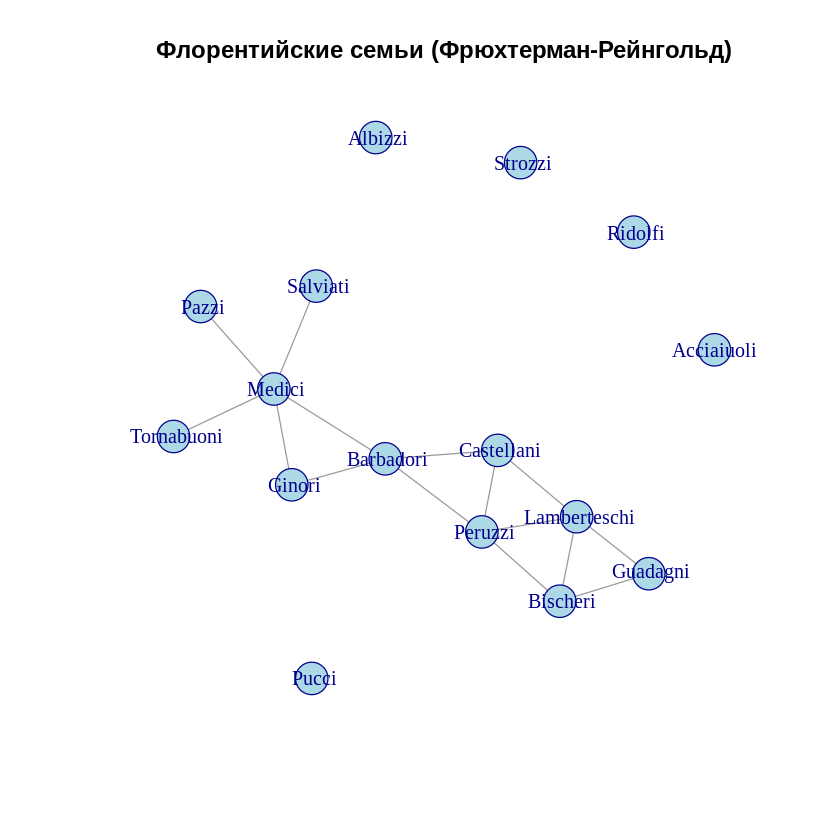

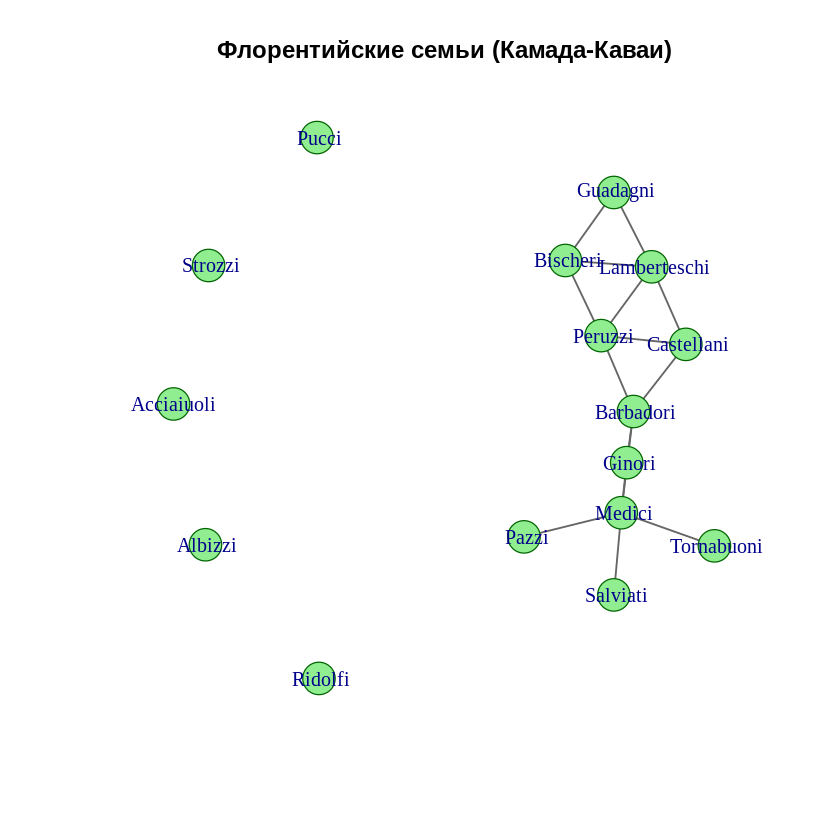

In [ ]:
# Визуализация с использованием алгоритма Фрюхтермана-Рейнгольда
plot(florentine_graph,
     main = "Флорентийские семьи (Фрюхтерман-Рейнгольд)",
     layout = layout_with_fr,
     vertex.color = "lightblue",
     vertex.frame.color = "darkblue",
     vertex.size = 12,
     edge.color = "gray60")

# Визуализация с использованием алгоритма Камады-Каваи
plot(florentine_graph,
     main = "Флорентийские семьи (Камада-Каваи)",
     layout = layout_with_kk,
     vertex.color = "lightgreen",
     vertex.frame.color = "darkgreen",
     vertex.size = 12,
     edge.color = "gray40",
     edge.width = 1.5)

Алгоритм Фрюхтермана–Рейнгольда основан на силовой модели: вершины отталкиваются друг от друга, а рёбра стягивают их как пружины. В результате итеративного балансирования сил возникает равномерное, эстетичное расположение вершин.

Алгоритм Камада–Каваи минимизирует разницу между геодезическими (графовыми) расстояниями и евклидовыми расстояниями на плоскости. Это позволяет точнее передать структурную близость вершин, сохраняя метрические отношения внутри сети.

Итог:

- Фрюхтерман–Рейнгольд → читаемость, равномерность.

- Камада–Каваи → точность в отображении структурной близости.

#### 6. Вывод «описательной сводки» сети

In [ ]:
# Преобразование графа из формата igraph в формат statnet
statnet_graph <- asNetwork(florentine_graph)

# Вывод описательной статистики графа
summary(statnet_graph)

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 15 
   missing edges = 0 
   non-missing edges = 15 
 density = 0.125 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    3    5
 [2,]    3    6
 [3,]    3    9
 [4,]    3   11
 [5,]    4    7
 [6,]    4    8
 [7,]    4   11
 [8,]    5    8
 [9,]    5   11
[10,]    6    9
[11,]    7    8
[12,]    8   11
[13,]    9   10
[14,]    9   14
[15,]    9   16

#### 7. Вычисление «пятичисловой сводки» сети

In [ ]:
# (a) Размер сети
cat("a) Размер сети:\n")
cat("Количество вершин:", network.size(statnet_graph), "\n\n")

# (b) Плотность сети
cat("b) Плотность сети:\n")
# Ручной расчёт: 2L / (n*(n-1)) для неориентированного графа
vertex_count <- network.size(statnet_graph)
edge_count <- network.edgecount(statnet_graph)
manual_density <- (2 * edge_count) / (vertex_count * (vertex_count - 1))
cat("Плотность (ручной расчёт):", round(manual_density, 3), "\n")
cat("Плотность (функция gden):", round(gden(statnet_graph), 3), "\n\n")

# (c) Число компонент связности
cat("c) Число компонент связности:\n")
cat("Число компонент (визуальная оценка):", 6, "\n")
# Подтверждение через функцию
connected_components <- components(statnet_graph)
cat("Число компонент (функция components):", connected_components, "\n\n")

# (d) Диаметр сети
cat("d) Диаметр сети:\n")
largest_component <- component.largest(statnet_graph, result = "graph")
geodesic_dist <- geodist(largest_component)
network_diameter <- max(geodesic_dist$gdist)
cat("Максимальное расстояние:", network_diameter, "\n\n")

# (e) Коэффициент кластеризации
cat("e) Коэффициент кластеризации:\n")
clustering_coefficient <- gtrans(statnet_graph, mode = "graph")
cat("Коэффициент кластеризации:", round(clustering_coefficient, 3), "\n")

a) Размер сети:
Количество вершин: 16 

b) Плотность сети:
Плотность (ручной расчёт): 0.125 
Плотность (функция gden): 0.125 

c) Число компонент связности:
Число компонент (визуальная оценка): 6 
Число компонент (функция components): 6 

d) Диаметр сети:
Максимальное расстояние: 5 

e) Коэффициент кластеризации:
Коэффициент кластеризации: 0.417 


#### Вывод
Граф деловых связей 16 флорентийских семей имеет низкую плотность, что указывает на ограниченное количество отношений между семьями. Обнаружено 6 компонент связности, подтверждающих фрагментарность сообщества — семьи объединены в отдельные, практически не связанные между собой группы.

Диаметр наибольшей компоненты составляет 5, формально соответствуя теории «шести рукопожатий», но из-за изолированности компонент эта теория не реализуется для всей сети.

Умеренная кластеризация наблюдается только в основной компоненте, где некоторые семьи образуют более плотные подгруппы. В целом, сеть демонстрирует локальную связанность внутри групп при общей разобщённости на уровне всего сообщества.

#### 8. Таблица мер центральности

In [ ]:
# Выделяем только связанные вершины
active_nodes <- which(degree(statnet_graph) != 0)
core_network <- get.inducedSubgraph(statnet_graph, active_nodes)

# Рассчитываем центральность
N <- network.size(core_network)

deg_raw <- degree(core_network) / 2
close_raw <- closeness(core_network, gmode = "graph")
betw_raw <- betweenness(core_network, gmode = "graph")
info_raw <- infocent(core_network, gmode = "graph")

# Нормируем показатели
deg_norm <- deg_raw / (N - 1)
close_norm <- (N - 1) * close_raw
betw_norm <- (2 * betw_raw) / ((N - 1) * (N - 2))
info_norm <- info_raw / sum(info_raw)

# Формируем таблицу результатов
centrality_results <- data.frame(
  Семья = network.vertex.names(core_network),
  Степень = round(deg_norm, 3),
  Близость = round(close_norm, 3),
  Посредничество = round(betw_norm, 3),
  Информ = round(info_norm, 3)
)

cat("Нормированные показатели центральности:\n")
print(centrality_results, row.names = FALSE)

Нормированные показатели центральности:
         Семья Степень Близость Посредничество Информ
     Barbadori     0.4    5.882          0.556  0.124
      Bischeri     0.3    4.000          0.056  0.089
    Castellani     0.3    5.000          0.111  0.105
        Ginori     0.2    4.545          0.000  0.095
      Guadagni     0.2    3.125          0.000  0.077
  Lamberteschi     0.4    4.167          0.133  0.098
        Medici     0.5    5.263          0.533  0.111
         Pazzi     0.1    3.571          0.000  0.064
       Peruzzi     0.4    5.263          0.300  0.109
      Salviati     0.1    3.571          0.000  0.064
    Tornabuoni     0.1    3.571          0.000  0.064


#### Вывод
Сеть флорентийских семей имеет четкую иерархию. Семья Медичи — явный лидер по
всем показателям. У них самые высокие значения степени центральности (0,5), близости (5,26) и посредничества (0,533). Семьи Барбадори и Ламбертески занимают второе место по влиянию. При этом семьи Пазци, Сальвиати и Торнабуони находятся на периферии сети с низкими показателями (степень 0,1, посредничество 0). Это показывает сильную централизацию сети вокруг нескольких ключевых семей.

### Работа с krackhardt_advice.csv

#### 1. Извлечение из krackhardt_advice.csv социоматрицы и вывод её на экран



In [4]:
# Ссылка на файл с данными о советах среди менеджеров
data_url <- "https://drive.google.com/uc?export=download&id=1nUJz0xHtd_Lfpw5trk_vFEFQ8YBtW5YP"

advice_matrix <- as.matrix(read.csv(data_url,
                                    header = FALSE,
                                    skip = 2,
                                    stringsAsFactors = FALSE))

print(advice_matrix)

      V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20
 [1,]  0  1  0  1  0  0  0  1  0   0   0   0   0   0   0   1   0   1   0   0
 [2,]  0  0  0  0  0  1  1  0  0   0   0   0   0   0   0   0   0   0   0   0
 [3,]  1  1  0  1  0  1  1  1  1   1   1   1   0   1   0   0   1   1   0   1
 [4,]  1  1  0  0  0  1  0  1  0   1   1   1   0   0   0   1   1   1   0   1
 [5,]  1  1  0  0  0  1  1  1  0   1   1   0   1   1   0   1   1   1   1   1
 [6,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
 [7,]  0  1  0  0  0  1  0  0  0   0   1   1   0   1   0   0   1   1   0   0
 [8,]  0  1  0  1  0  1  1  0  0   1   1   0   0   0   0   0   0   1   0   0
 [9,]  1  1  0  0  0  1  1  1  0   1   1   1   0   1   0   1   1   1   0   0
[10,]  1  1  1  1  1  0  0  1  0   0   1   0   1   0   1   1   1   1   1   1
[11,]  1  1  0  0  0  0  1  0  0   0   0   0   0   0   0   0   0   0   0   0
[12,]  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   0   0   0   0   0

#### 2. Преобразование социоматрицы в список рёбер. Вывод первых элементов списка рёбер.

In [5]:
# Создаем пустой вектор для пар вершин (рёбер)
edge_list <- character(0)

# Обходим матрицу смежности по строкам и столбцам
for (row_idx in seq_len(nrow(advice_matrix))) {
  for (col_idx in seq_len(ncol(advice_matrix))) {
    # Проверяем наличие связи между вершинами
    if (advice_matrix[row_idx, col_idx] == 1) {
      # Форматируем ребро
      current_edge <- sprintf("%d-%d", row_idx, col_idx)
      edge_list <- c(edge_list, current_edge)
    }
  }
}

# Выводим первые несколько рёбер
edge_count_to_show <- min(5, length(edge_list))
cat("Первые", edge_count_to_show, "рёбер в графе:\n")

for (edge_position in seq_len(edge_count_to_show)) {
  cat(edge_list[edge_position], "\n")
}

Первые 5 рёбер в графе:
1-2 
1-4 
1-8 
1-16 
1-18 


#### 3. Присвоение имен столбцам и строкам социоматрицы

In [6]:
# Создаем метки для вершин по количеству строк в исходных данных и присваиваем их
dimnames(advice_matrix) <- list(
  1:nrow(advice_matrix),
  1:ncol(advice_matrix)
)

print(advice_matrix)

   1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21
1  0 1 0 1 0 0 0 1 0  0  0  0  0  0  0  1  0  1  0  0  1
2  0 0 0 0 0 1 1 0 0  0  0  0  0  0  0  0  0  0  0  0  1
3  1 1 0 1 0 1 1 1 1  1  1  1  0  1  0  0  1  1  0  1  1
4  1 1 0 0 0 1 0 1 0  1  1  1  0  0  0  1  1  1  0  1  1
5  1 1 0 0 0 1 1 1 0  1  1  0  1  1  0  1  1  1  1  1  1
6  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  1
7  0 1 0 0 0 1 0 0 0  0  1  1  0  1  0  0  1  1  0  0  1
8  0 1 0 1 0 1 1 0 0  1  1  0  0  0  0  0  0  1  0  0  1
9  1 1 0 0 0 1 1 1 0  1  1  1  0  1  0  1  1  1  0  0  1
10 1 1 1 1 1 0 0 1 0  0  1  0  1  0  1  1  1  1  1  1  0
11 1 1 0 0 0 0 1 0 0  0  0  0  0  0  0  0  0  0  0  0  0
12 0 0 0 0 0 0 1 0 0  0  0  0  0  0  0  0  0  0  0  0  1
13 1 1 0 0 1 0 0 0 1  0  0  0  0  1  0  0  0  1  0  0  0
14 0 1 0 0 0 0 1 0 0  0  0  0  0  0  0  0  0  1  0  0  1
15 1 1 1 1 1 1 1 1 1  1  1  1  1  1  0  1  1  1  1  1  1
16 1 1 0 0 0 0 0 0 0  1  0  0  0  0  0  0  0  1  0  0  0
17 1 1 0 1 0 0 1 0 0  0  0  0  

#### 4. Построение ненаправленной сети с объяснением параметров

In [7]:
# Создаем ориентированный граф из матрицы смежности
krackhardt_graph <- graph_from_adjacency_matrix(advice_matrix, mode = 'directed')

#### 5. Отображение сети с помощью алгоритмов укладки

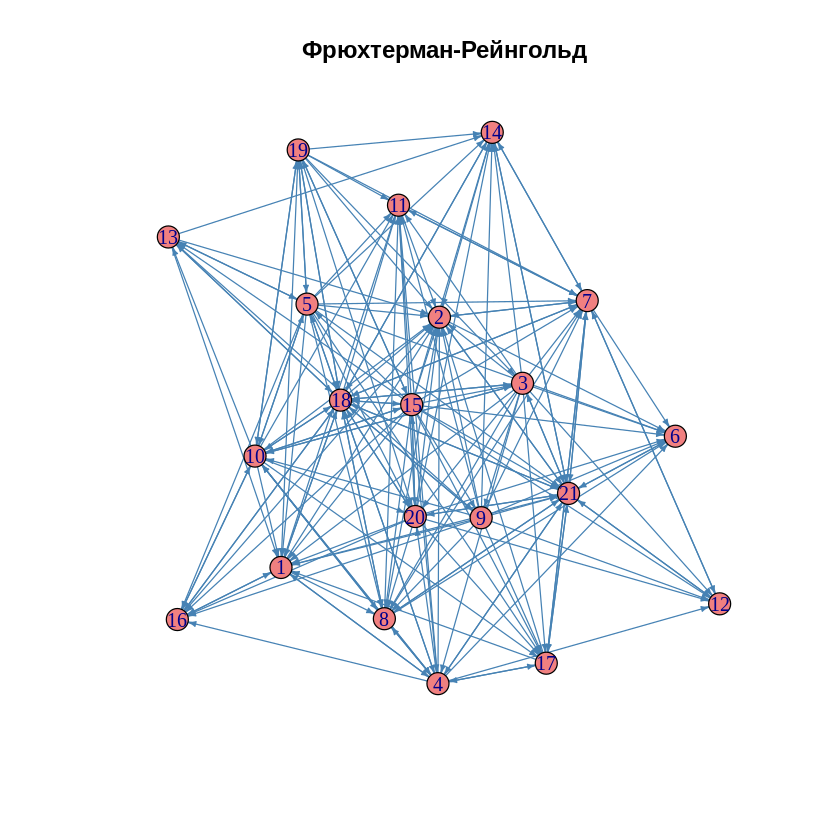

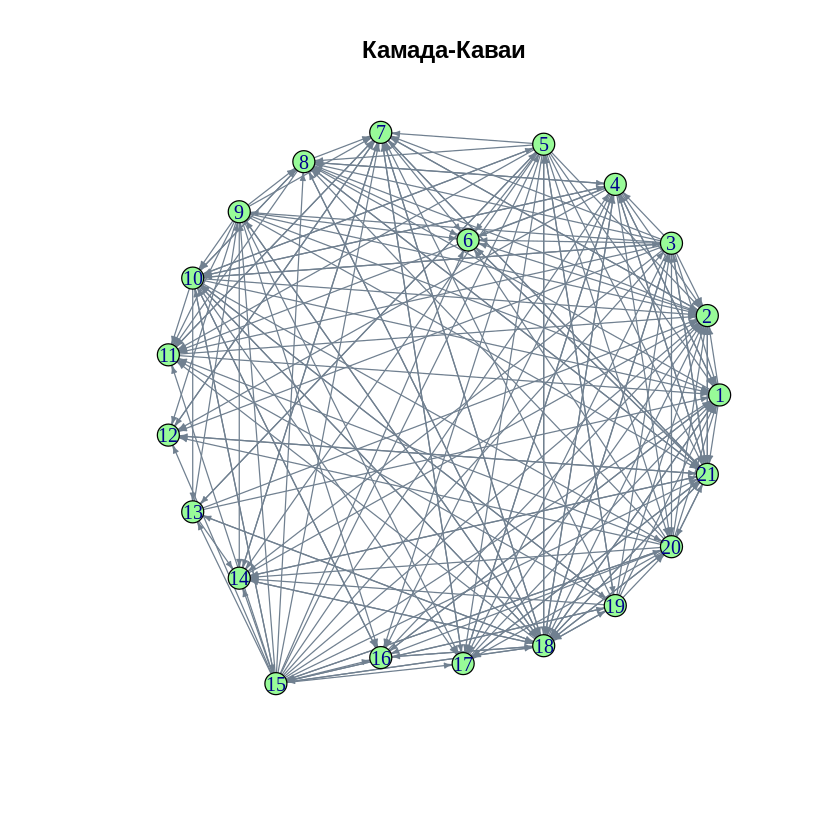

In [8]:
# Визуализация алгоритмом Фрюхтермана-Рейнгольда
plot(krackhardt_graph,
     main = "Фрюхтерман-Рейнгольд",
     layout = layout_with_fr,
     vertex.color = "lightcoral",
     vertex.size = 8,
     edge.arrow.size = 0.3,
     edge.color = "steelblue")

# Визуализация алгоритмом Камада-Каваи
plot(krackhardt_graph,
     main = "Камада-Каваи",
     layout = layout_with_kk,
     vertex.color = "palegreen",
     vertex.size = 8,
     edge.arrow.size = 0.3,
     edge.color = "slategray")

#### 6. Вывод «описательной сводки» сети

In [9]:
# Преобразование ориентированного графа в формат statnet
krack_statnet <- asNetwork(krackhardt_graph)

# Вывод сводной информации о сети
summary(krack_statnet)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 190 
   missing edges = 0 
   non-missing edges = 190 
 density = 0.452381 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

Network edgelist matrix:
       [,1] [,2]
  [1,]    1    2
  [2,]    1    4
  [3,]    1    8
  [4,]    1   16
  [5,]    1   18
  [6,]    1   21
  [7,]    2    6
  [8,]    2    7
  [9,]    2   21
 [10,]    3    1
 [11,]    3    2
 [12,]    3    4
 [13,]    3    6
 [14,]    3    7
 [15,]    3    8
 [16,]    3    9
 [17,]    3   10
 [18,]    3   11
 [19,]    3   12
 [20,]    3   14
 [21,]    3   17
 [22,]    3   18
 [23,]    3   20
 [24,]    3   21
 [25,]    4    1
 [26,]    4    2
 [27,]    4    6
 [28,]    4    8
 [29,]    4   10
 [30,]    4   11
 [31,]    4   12
 [32,]    4   16
 [33,]    4   17
 [34,]    4   18
 [35,]    4   20
 [36,]    4   21
 [37,]    5    1
 

#### 7. Вычисление «пятичисловой сводки» сети

In [10]:
# (a) Размер сети
cat("a) Размер сети:\n")
cat("Число вершин:", network.size(krack_statnet), "\n\n")

# (b) Плотность сети
cat("b) Плотность сети:\n")
manager_count <- network.size(krack_statnet)
connection_count <- network.edgecount(krack_statnet)
calc_density <- connection_count / (manager_count * (manager_count - 1))
cat("Плотность(вручную):", round(calc_density, 3), "\n")
cat("Плотность(функция):", round(gden(krack_statnet), 3), "\n\n")

# (c) Число компонент
cat("c) Число компонент связности:\n")
cat("Оценка по графу: 1\n")
component_total <- components(krack_statnet)
cat("Результат components():", component_total, "\n\n")

# (d) Диаметр сети
cat("d) Диаметр сети:\n")
core_component <- component.largest(krack_statnet, result = "graph")
distance_matrix <- geodist(core_component)
network_diameter <- max(distance_matrix$gdist)
cat("Макс. расстояние между вершинами:", network_diameter, "\n\n")

# (e) Коэффициент кластеризации
cat("e) Коэффициент кластеризации:\n")
transitivity_value <- gtrans(krack_statnet, mode = "graph")
cat("Коэффициент кластеризации:", round(transitivity_value, 3), "\n")

a) Размер сети:
Число вершин: 21 

b) Плотность сети:
Плотность(вручную): 0.452 
Плотность(функция): 0.452 

c) Число компонент связности:
Оценка по графу: 1
Результат components(): 1 

d) Диаметр сети:
Макс. расстояние между вершинами: 3 

e) Коэффициент кластеризации:
Коэффициент кластеризации: 0.664 


#### Вывод
Сеть из 21 менеджера обладает высокой плотностью (0.452), что указывает на развитую и интенсивную систему внутренних консультаций. Все сотрудники объединены в единую связную компоненту с диаметром 3, что означает высокую скорость и эффективность распространения информации: любое сообщение или решение достигает адресата максимум за три шага. Одновременно высокий коэффициент кластеризации (0.664) свидетельствует о формировании устойчивых микрогрупп или "треугольников" доверия, где сотрудники, обращающиеся к общему советнику, также тесно взаимодействуют между собой. Таким образом, организационная структура компании представляет собой оптимальную модель для быстрого обмена знаниями и принятия скоординированных решений, типичную для эффективных проектных команд в высокотехнологичных отраслях. Эта структура сочетает открытость коммуникаций с устойчивостью внутренних связей.

#### 8. Таблица мер престижа

In [12]:
# Престиж по степени (входящая центральность)
manager_count <- network.size(krack_statnet)
in_degree_prestige <- degree(krack_statnet, cmode = "indegree") / (manager_count - 1)

# Престиж по близости
close_centrality <- igraph::closeness(krackhardt_graph, mode = "in", normalized = FALSE)
reachable_from_i <- colSums(igraph::distances(krackhardt_graph, mode = "in") > 0)
proximity_prestige <- (reachable_from_i^2 / (manager_count - 1)) * close_centrality

# Престиж по рангу
adjacency_matrix <- advice_matrix
max_eigenvalue <- ceiling(max(Re(eigen(adjacency_matrix)$values)))
alpha_param <- 1 / max_eigenvalue
column_sums <- colSums(adjacency_matrix)
num_nodes <- ncol(adjacency_matrix)
identity_mat <- diag(num_nodes)
transposed_mat <- t(adjacency_matrix)
equation_system <- (1/alpha_param) * identity_mat - transposed_mat
rank_prestige_raw <- solve(equation_system, column_sums)

# Нормировка
scaling_factor <- 0
for (k in 0:(manager_count-1)) {
    permutation_count <- if(k == 0) 1 else factorial(manager_count-1) / factorial(manager_count-1-k)
    scaling_factor <- scaling_factor + (alpha_param^k) * permutation_count
}
rank_prestige_norm <- rank_prestige_raw / scaling_factor

# Формируем сводную таблицу
manager_prestige_df <- data.frame(
  Вершины = network.vertex.names(krack_statnet),
  По_степени = round(in_degree_prestige, 4),
  По_близости = round(proximity_prestige, 4),
  По_рангу = round(rank_prestige_norm, 4)
)

# Вывод результатов
cat("Меры престижа в сети советов:\n")
print(manager_prestige_df, row.names = FALSE)

Меры престижа в сети советов:
 Вершины По_степени По_близости По_рангу
       1       0.65      0.6667   0.0094
       2       0.90      0.9091   0.0155
       3       0.25      0.5556   0.0047
       4       0.40      0.6250   0.0079
       5       0.25      0.5000   0.0035
       6       0.50      0.6667   0.0095
       7       0.65      0.7407   0.0118
       8       0.50      0.6667   0.0086
       9       0.20      0.4878   0.0029
      10       0.45      0.5714   0.0065
      11       0.55      0.6667   0.0087
      12       0.35      0.5882   0.0062
      13       0.20      0.4878   0.0031
      14       0.50      0.6667   0.0079
      15       0.20      0.4878   0.0034
      16       0.40      0.5714   0.0064
      17       0.45      0.6452   0.0074
      18       0.75      0.8000   0.0121
      19       0.20      0.4878   0.0031
      20       0.40      0.6061   0.0067
      21       0.75      0.8000   0.0141


#### Вывод
В сети советов явно выделяется один лидер — менеджер №2. К нему обращаются 90% коллег (0.90), он ближе всех к остальным (0.9091), и его статус подтверждается высоким рангом (0.0155).

Рядом с ним находится сильная группа влиятельных лиц: №1, №18 и №21. Их показатели (степень 0.65-0.75, близость 0.67-0.80) намного выше среднего.

Одновременно почти треть коллектива (№3, №5, №9, №13, №15, №19) практически не востребована как источник советов (показатели степени 0.20-0.25). Это создает заметный разрыв между ядром экспертов и периферией сети.

## Выводы

Проведённый анализ наглядно показывает, как устроены социальные связи в двух разных сообществах. Сеть флорентийских семей оказалась разреженной и раздробленной, что говорит об избирательности в деловых связях и наличии закрытых кланов. Власть в ней была жёстко централизована вокруг одной-двух ключевых фамилий.

В отличие от этого, сообщество менеджеров представляет собой плотную, хорошо связанную и быструю сеть для обмена советами. Здесь общение открыто, информация распространяется почти мгновенно, и, хотя есть признанные эксперты, структура больше походит на команду, чем на иерархию.

Таким образом, первый пример иллюстрирует модель "закрытой элиты", где связи — это стратегический капитал, а второй — модель "открытой команды", где связи — это инфраструктура для эффективной совместной работы.